# Data Preprocessing

### Import relevant libraries

In [231]:
import pandas as pd
import datetime

### Import and build news data

In [232]:
news_data = pd.read_csv('Input/BR_News.txt', names = ['Date', 'News'], index_col = 0) #Original raw data file

In [233]:
news_data1 = pd.read_csv('Input/Dawn_News.txt', names = ['Date', 'News'], index_col = 0) #Original raw data file

In [234]:
news_data['Polarity'] = [0 for i in range(len(news_data))] #Initialize polarities to zero

In [235]:
news_data1['Polarity'] = [0 for i in range(len(news_data1))] #Initialize polarities to zero

In [236]:
news_data['Sentiment'] = [0 for i in range(len(news_data))] #Initialize polarities to zero

In [237]:
news_data1['Sentiment'] = [0 for i in range(len(news_data1))] #Initialize polarities to zero

In [238]:
news_data.drop_duplicates(subset ="News", 
                     keep = False, inplace = True) 
  

In [239]:
news_data1.drop_duplicates(subset ="News", 
                     keep = False, inplace = True) 
  

In [240]:
news_data.head()

,Date,News,Polarity,Sentiment
0,2011-04-02,Political parties should work for resolution o...,0,0
1,2011-04-05,"China to invest in hydel, renewable energy pow...",0,0
2,2011-04-06,Govt mulling to empower eight public sector en...,0,0
3,2011-04-06,"China offers financial, technical assistance f...",0,0
4,2011-04-06,Shipping activity at Port Qasim - KARACHI: Shi...,0,0


In [241]:
news_data1.head()

,Date,News,Polarity,Sentiment
0,2011-04-01,Judgment on judges` extension case suspended,0,0
1,2011-04-01,Gilani hints at giving subsidy on oil prices,0,0
2,2011-04-01,Agencies averse to aerial survey by foreigners,0,0
3,2011-04-01,SC gives PPP leaders time to file reply in con...,0,0
4,2011-04-01,"Quake measuring 5.2 rattles Islamabad, Mansehra",0,0


In [242]:
news_data.info()

news_data = news_data.iloc[1:]
news_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57996 entries, 0 to 58988
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       57996 non-null  object
 1   News       57996 non-null  object
 2   Polarity   57996 non-null  int64 
 3   Sentiment  57996 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


,Date,News,Polarity,Sentiment
1,2011-04-05,"China to invest in hydel, renewable energy pow...",0,0
2,2011-04-06,Govt mulling to empower eight public sector en...,0,0
3,2011-04-06,"China offers financial, technical assistance f...",0,0
4,2011-04-06,Shipping activity at Port Qasim - KARACHI: Shi...,0,0
5,2011-04-06,Rupee gains vs dollar on healthy inflows; stoc...,0,0


In [243]:
news_data['Date'] = pd.to_datetime(news_data['Date']) #Convert to datetime
news_data['Date'] = news_data["Date"].dt.strftime("%d %m %Y") #Format date
news_data['News'].map(str) #Convert news to string

1        China to invest in hydel, renewable energy pow...
2        Govt mulling to empower eight public sector en...
3        China offers financial, technical assistance f...
4        Shipping activity at Port Qasim - KARACHI: Shi...
5        Rupee gains vs dollar on healthy inflows; stoc...
                               ...                        
58984    90pc criminals acquitted due to faulty investi...
58985    Regulatory bodies: AGP to begin audit decision...
58986    Northern South Asian region: Goethe-Institut h...
58987    Buzdar making efforts to woo opposition MPAs a...
58988    DS inspects KCR track - KARACHI: The newly app...
Name: News, Length: 57995, dtype: object

In [244]:
news_data1['Date'] = pd.to_datetime(news_data1['Date']) #Convert to datetime
news_data1['Date'] = news_data1["Date"].dt.strftime("%d %m %Y") #Format date
news_data1['News'].map(str) #Convert news to string

0             Judgment on judges` extension case suspended
1             Gilani hints at giving subsidy on oil prices
2           Agencies averse to aerial survey by foreigners
3        SC gives PPP leaders time to file reply in con...
4          Quake measuring 5.2 rattles Islamabad, Mansehra
                               ...                        
28590    Tabuk governor arrives in Dalbandin to hunt ho...
28591    Broadsheet commission to probe other cases as ...
28593    Opposition slams move to bring Senate polls bi...
28594    SC issues notice to NAB on Zardari’s pleas for...
28595    Japan to provide $4.57m grant to help procure ...
Name: News, Length: 23006, dtype: object

In [245]:
news_data1.tail()


,Date,News,Polarity,Sentiment
28590,28 01 2021,Tabuk governor arrives in Dalbandin to hunt ho...,0,0
28591,28 01 2021,Broadsheet commission to probe other cases as ...,0,0
28593,28 01 2021,Opposition slams move to bring Senate polls bi...,0,0
28594,28 01 2021,SC issues notice to NAB on Zardari’s pleas for...,0,0
28595,28 01 2021,Japan to provide $4.57m grant to help procure ...,0,0


In [246]:
news_data1.tail()

,Date,News,Polarity,Sentiment
28590,28 01 2021,Tabuk governor arrives in Dalbandin to hunt ho...,0,0
28591,28 01 2021,Broadsheet commission to probe other cases as ...,0,0
28593,28 01 2021,Opposition slams move to bring Senate polls bi...,0,0
28594,28 01 2021,SC issues notice to NAB on Zardari’s pleas for...,0,0
28595,28 01 2021,Japan to provide $4.57m grant to help procure ...,0,0


In [247]:
news_data1.drop_duplicates(subset = 'News', keep = False, inplace = True)


In [248]:
news_data.head()

,Date,News,Polarity,Sentiment
1,05 04 2011,"China to invest in hydel, renewable energy pow...",0,0
2,06 04 2011,Govt mulling to empower eight public sector en...,0,0
3,06 04 2011,"China offers financial, technical assistance f...",0,0
4,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0,0
5,06 04 2011,Rupee gains vs dollar on healthy inflows; stoc...,0,0


In [249]:
news_data1.head()

,Date,News,Polarity,Sentiment
0,01 04 2011,Judgment on judges` extension case suspended,0,0
1,01 04 2011,Gilani hints at giving subsidy on oil prices,0,0
2,01 04 2011,Agencies averse to aerial survey by foreigners,0,0
3,01 04 2011,SC gives PPP leaders time to file reply in con...,0,0
4,01 04 2011,"Quake measuring 5.2 rattles Islamabad, Mansehra",0,0


In [250]:
news_data.reset_index(drop = True, inplace = True)

In [251]:
news_data1.reset_index(drop = True, inplace = True)

In [252]:
news_data.head()

,Date,News,Polarity,Sentiment
0,05 04 2011,"China to invest in hydel, renewable energy pow...",0,0
1,06 04 2011,Govt mulling to empower eight public sector en...,0,0
2,06 04 2011,"China offers financial, technical assistance f...",0,0
3,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0,0
4,06 04 2011,Rupee gains vs dollar on healthy inflows; stoc...,0,0


In [253]:
news_data1.head()

,Date,News,Polarity,Sentiment
0,01 04 2011,Judgment on judges` extension case suspended,0,0
1,01 04 2011,Gilani hints at giving subsidy on oil prices,0,0
2,01 04 2011,Agencies averse to aerial survey by foreigners,0,0
3,01 04 2011,SC gives PPP leaders time to file reply in con...,0,0
4,01 04 2011,"Quake measuring 5.2 rattles Islamabad, Mansehra",0,0


### Import and stock prices as daily difference

In [254]:
diff = pd.read_csv('Companies diff\BATA PA Equity.csv')

In [255]:
diff.describe()

,Open,High,Low,Close,Volume
count,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.313526,0.313649,0.313649,0.313649,-0.131860
std,36.473366,32.277586,32.667840,29.132928,9458.569113
min,-361.265700,-361.265700,-178.694300,-178.694300,-310109.000000
25%,-0.111400,-0.261700,-0.306200,-0.110000,-40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.452600,0.612300,0.556700,0.441500,40.000000
max,304.549700,185.003100,252.099000,176.200400,309774.000000


In [256]:
diff['Date'] = pd.to_datetime(diff['Date']) #Convert date to datetime

In [257]:
diff.head()

,Open,High,Low,Close,Volume,Date
0,-0.6328,1.0876,1.0678,1.0876,800.0,2001-01-03
1,0.0000,0.0000,0.0000,0.0000,0.0,2001-01-04
2,0.0000,0.0000,0.0000,0.0000,0.0,2001-01-05
3,0.0000,0.0000,0.0000,0.0000,0.0,2001-01-08
4,0.0000,0.0000,0.0000,0.0000,0.0,2001-01-09


In [258]:
diff.tail()

,Open,High,Low,Close,Volume,Date
5152,165.0,120.0,14.01,-30.49,-480.0,2020-10-02
5153,-190.0,-180.0,-59.01,-39.51,-80.0,2020-10-05
5154,-25.0,-26.0,-30.00,-18.40,300.0,2020-10-06
5155,11.0,4.0,30.00,4.90,-60.0,2020-10-07
5156,-11.0,-13.0,-5.00,-11.50,-540.0,2020-10-08


In [259]:
diff.describe()

,Open,High,Low,Close,Volume
count,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.313526,0.313649,0.313649,0.313649,-0.131860
std,36.473366,32.277586,32.667840,29.132928,9458.569113
min,-361.265700,-361.265700,-178.694300,-178.694300,-310109.000000
25%,-0.111400,-0.261700,-0.306200,-0.110000,-40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.452600,0.612300,0.556700,0.441500,40.000000
max,304.549700,185.003100,252.099000,176.200400,309774.000000


### Make relevant functions to map polarities and take into account weekends

In [260]:
def pol(val, mean, std):
    #print(val)
    if val >= mean + std:
        
        return 1
    
    elif val < mean-std:
        
        return -1
    
    else:
        
        return 0

# Year, month, day	
def check(x):
    d3 = datetime.datetime.strptime(x, '%d %m %Y')
    d2 = datetime.datetime.strptime(x, '%d %m %Y').weekday()
   # print(d3)
    ##print(d2)

    if (d2 == 5):
        d1 = d3 - datetime.timedelta(days = 1)
    elif (d2 == 6):
        d1 = d3 - datetime.timedelta(days = 2)
    else:
        d1 = d3
    #print(d1)    
    return d1


check('08 02 2009')

datetime.datetime(2009, 2, 6, 0, 0)

In [261]:
news_data.head()


,Date,News,Polarity,Sentiment
0,05 04 2011,"China to invest in hydel, renewable energy pow...",0,0
1,06 04 2011,Govt mulling to empower eight public sector en...,0,0
2,06 04 2011,"China offers financial, technical assistance f...",0,0
3,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0,0
4,06 04 2011,Rupee gains vs dollar on healthy inflows; stoc...,0,0


In [262]:
news_data1.head()


,Date,News,Polarity,Sentiment
0,01 04 2011,Judgment on judges` extension case suspended,0,0
1,01 04 2011,Gilani hints at giving subsidy on oil prices,0,0
2,01 04 2011,Agencies averse to aerial survey by foreigners,0,0
3,01 04 2011,SC gives PPP leaders time to file reply in con...,0,0
4,01 04 2011,"Quake measuring 5.2 rattles Islamabad, Mansehra",0,0


In [263]:
x = len(news_data)
print(x)

57995


In [264]:
print(len(diff))


5157


In [265]:
news_data = news_data.append(news_data1, ignore_index=True)

In [266]:
len(news_data)

81001

In [267]:
news_data.head(10)

,Date,News,Polarity,Sentiment
0,05 04 2011,"China to invest in hydel, renewable energy pow...",0,0
1,06 04 2011,Govt mulling to empower eight public sector en...,0,0
2,06 04 2011,"China offers financial, technical assistance f...",0,0
3,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0,0
4,06 04 2011,Rupee gains vs dollar on healthy inflows; stoc...,0,0
5,06 04 2011,A stable Pakistan is beneficial for Afghanista...,0,0
6,06 04 2011,Britain can play major role in improving educa...,0,0
7,07 04 2011,"Gold eases at Rs 39,600 after touching record ...",0,0
8,07 04 2011,"Saud, Khurram Shahzad released on bail - ISLAM...",0,0
9,07 04 2011,Rupee gains further; stocks fall - KARACHI: Ru...,0,0


### Label data with sentiment

In [268]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\CZ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [269]:
vader = SentimentIntensityAnalyzer()
scores = news_data['News'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
news_data = news_data.join(scores_df, rsuffix='_right')

In [270]:
news_data.head(25)

,Date,News,Polarity,Sentiment,neg,neu,pos,compound
0,05 04 2011,"China to invest in hydel, renewable energy pow...",0,0,0.000,0.754,0.246,0.7579
1,06 04 2011,Govt mulling to empower eight public sector en...,0,0,0.000,0.920,0.080,0.2500
2,06 04 2011,"China offers financial, technical assistance f...",0,0,0.000,0.923,0.077,0.2732
3,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0,0,0.000,0.895,0.105,0.4019
4,06 04 2011,Rupee gains vs dollar on healthy inflows; stoc...,0,0,0.046,0.798,0.156,0.5574
5,06 04 2011,A stable Pakistan is beneficial for Afghanista...,0,0,0.000,0.689,0.311,0.8176
6,06 04 2011,Britain can play major role in improving educa...,0,0,0.000,0.661,0.339,0.8689
7,07 04 2011,"Gold eases at Rs 39,600 after touching record ...",0,0,0.000,0.924,0.076,0.3182
8,07 04 2011,"Saud, Khurram Shahzad released on bail - ISLAM...",0,0,0.239,0.761,0.000,-0.7650
9,07 04 2011,Rupee gains further; stocks fall - KARACHI: Ru...,0,0,0.000,0.699,0.301,0.7650


In [271]:
'''for i in range(len(news_data)):
    
    if news_data['pos'][i] > news_data['neu'][i] and news_data['pos'][i] > news_data['neg'][i]:
        
        news_data['Sentiment'][i] = 1
        
    elif news_data['neu'][i] > news_data['pos'][i] and news_data['neu'][i] > news_data['neg'][i]:
        
        news_data['Sentiment'][i] = 0
        
    if news_data['neg'][i] > news_data['neu'][i] and news_data['neg'][i] > news_data['pos'][i]:
        
        news_data['Sentiment'][i] = -1'''
        

"for i in range(len(news_data)):\n    \n    if news_data['pos'][i] > news_data['neu'][i] and news_data['pos'][i] > news_data['neg'][i]:\n        \n        news_data['Sentiment'][i] = 1\n        \n    elif news_data['neu'][i] > news_data['pos'][i] and news_data['neu'][i] > news_data['neg'][i]:\n        \n        news_data['Sentiment'][i] = 0\n        \n    if news_data['neg'][i] > news_data['neu'][i] and news_data['neg'][i] > news_data['pos'][i]:\n        \n        news_data['Sentiment'][i] = -1"

In [272]:
for i in range(len(news_data)):
    
    if news_data['compound'][i] > 0.3:
        
        news_data['Sentiment'][i] = 1
        
    elif news_data['compound'][i] >= -0.3 and news_data['compound'][i] <= 0.3:
        
        news_data['Sentiment'][i] = 0
        
    if news_data['compound'][i] < -0.3:
        
        news_data['Sentiment'][i] = -1

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [273]:
news_data.describe()

,Polarity,Sentiment,neg,neu,pos,compound
count,81001.0,81001.000000,81001.000000,81001.000000,81001.000000,81001.000000
mean,0.0,0.064197,0.079778,0.842209,0.078012,0.030032
std,0.0,0.729080,0.131447,0.150677,0.104458,0.456721
min,0.0,-1.000000,0.000000,0.000000,0.000000,-0.986600
25%,0.0,0.000000,0.000000,0.753000,0.000000,-0.273200
50%,0.0,0.000000,0.000000,0.866000,0.000000,0.000000
75%,0.0,1.000000,0.125000,1.000000,0.132000,0.381800
max,0.0,1.000000,1.000000,1.000000,0.839000,0.989700


### Label data with polarity

In [274]:
count = 0
mean = diff['Open'].mean()
std = diff['Open'].std()

for i in range(len(news_data)):
    #print(i)
    #print(news_data['Date'][i])
    
    date = check(news_data['Date'][i])
    #print(date)
    index = diff.index[diff['Date'] == date]
    #print(type(index))
    #print(index)
    #print(diff['Close'][index])
    if (index <= len(diff)):
        count+=1
        polarity = pol(float(diff['Open'][index]), mean, std)
        #print(polarity)
        news_data['Polarity'][i] = polarity


7.925799999999981
0.17720000000002756
0.17720000000002756
0.17720000000002756
0.17720000000002756
0.17720000000002756
0.17720000000002756
1.081700000000012
1.081700000000012
1.081700000000012
1.081700000000012
1.081700000000012
1.081700000000012
1.081700000000012
1.081700000000012
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-3.1716000000000117
-4.302099999999996
-4.302099999999996
-4.302099999999996
-4.302099999999996
-4.302099999999996
0.0
0.0
0.0
0.0
0.0
0.0
0.0

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.5132999999999583
0.5132999999999583
0.5132999999999583
0.5132999999999583
0.5132999999999583
-0.6279999999999859
-0.6279999999999859
-0.6279999999999859
-0.6279999999999859
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.3317000000000119
-1.7324999999999589
-1.7324999999999589
-1.7324999999999589
-1.7324999999999589
-1.7324999999999589
-1.6807000000000016
-1.6807000000000016
-1.6807000000000016
-1.6807000000000016
-1.6807000000000016
-1.6807000000000016
-1.6807000000000016
-1.6807000000000016
-1.6807000000000016
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.962699999999984
3.962699999999984
3.962699999999984
3.962699999999984
3.962699999999984
3.962699999999984
3.962699999999984
-10.084599999999966
-10.084599999999966
-10.084599999999966
-10.084599999999966
-10.084599999999966
-10.084599

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  from ipykernel import kernelapp as app


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
0.09780000000000656
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
7.925799999999981
0.17720000000002756
0.17720000000002756
0.17720000000002756
0.17720000000002756
0.177200000000

In [275]:
news_data.describe()

,Polarity,Sentiment,neg,neu,pos,compound
count,81001.000000,81001.000000,81001.000000,81001.000000,81001.000000,81001.000000
mean,0.003481,0.064197,0.079778,0.842209,0.078012,0.030032
std,0.515908,0.729080,0.131447,0.150677,0.104458,0.456721
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,-0.986600
25%,0.000000,0.000000,0.000000,0.753000,0.000000,-0.273200
50%,0.000000,0.000000,0.000000,0.866000,0.000000,0.000000
75%,0.000000,1.000000,0.125000,1.000000,0.132000,0.381800
max,1.000000,1.000000,1.000000,1.000000,0.839000,0.989700


### Label data with cumulative labels

In [276]:
news_data['Cum'] = [-2 for i in range(len(news_data))] #Initialize polarities to zero

In [277]:
for i in range(len(news_data)):
    
    if news_data['Polarity'][i] == news_data['Sentiment'][i]:
        
        news_data['Cum'][i] = news_data['Polarity'][i]
        


C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [278]:
news_data = news_data[news_data['Cum'] != -2]
news_data.describe()

,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,33736.000000,33736.000000,33736.000000,33736.000000,33736.000000,33736.000000,33736.000000
mean,0.022380,0.022380,0.046346,0.906489,0.047164,0.012793,0.022380
std,0.416358,0.416358,0.092534,0.131322,0.081579,0.278882,0.416358
min,-1.000000,-1.000000,0.000000,0.123000,0.000000,-0.982600,-1.000000
25%,0.000000,0.000000,0.000000,0.833000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.066000,1.000000,0.077000,0.025800,0.000000
max,1.000000,1.000000,0.806000,1.000000,0.773000,0.989700,1.000000


Text(0.5, 1.0, 'Sentiment Data Distribution')

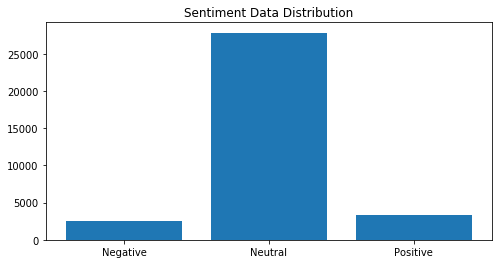

In [279]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
count_pos = news_data['Cum'].value_counts()[1]
count_ntl = news_data['Cum'].value_counts()[0]
count_neg = news_data['Cum'].value_counts()[-1]

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

In [280]:
size = (count_pos + count_neg)//2
temp = news_data.sort_values(by=['Cum'], ascending = False)
neutrals = temp[count_pos:count_ntl]
print(neutrals.head())
import random
filtered = neutrals.sample(n=size)
news_data = news_data[news_data.Polarity != 0]
news_data = pd.concat([news_data, filtered])

news_data.describe()

             Date                                               News  \
58327  18 04 2011  Pakistan Railways offers online reservations a...   
57159  19 01 2021  Bilawal to inaugurate Larkana Industrial Zone ...   
57020  18 01 2021  Govt makes Broadsheet judgment public: Shahzad...   
57019  18 01 2021  Court adjourns DRAP reference till Feb 18 - Th...   
57161  19 01 2021  Court fixes reference against Mandviwala and o...   

       Polarity  Sentiment    neg    neu    pos  compound  Cum  
58327         0          0  0.000  1.000  0.000    0.0000    0  
57159         0          0  0.000  1.000  0.000    0.0000    0  
57020         0          0  0.000  1.000  0.000    0.0000    0  
57019         0          0  0.065  0.935  0.000   -0.1531    0  
57161         0          0  0.000  0.934  0.066    0.2960    0  


,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000
mean,0.085825,0.085825,0.088232,0.821962,0.089807,0.041665,0.085825
std,0.812043,0.812043,0.134439,0.146239,0.109450,0.506488,0.812043
min,-1.000000,-1.000000,0.000000,0.123000,0.000000,-0.982600,-1.000000
25%,-1.000000,-1.000000,0.000000,0.738000,0.000000,-0.401900,-1.000000
50%,0.000000,0.000000,0.000000,0.837000,0.059000,0.000000,0.000000
75%,1.000000,1.000000,0.151000,0.928000,0.154000,0.476700,1.000000
max,1.000000,1.000000,0.806000,1.000000,0.773000,0.989700,1.000000


Text(0.5, 1.0, 'Sentiment Data Distribution')

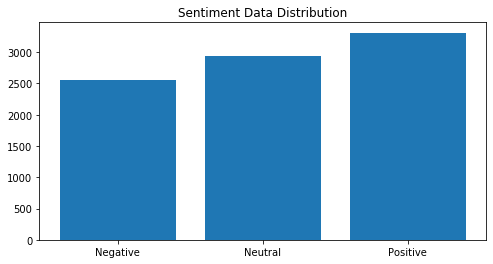

In [281]:
plt.figure(figsize=(8,4))
count_pos = news_data['Cum'].value_counts()[1]
count_ntl = news_data['Cum'].value_counts()[0]
count_neg = news_data['Cum'].value_counts()[-1]

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

### Save labelled data

In [282]:
news_data.to_csv(path_or_buf = 'Input/BATA_Good_News' + '.csv', index = False) #Save dataframe as CSV